In [1]:
%load_ext autoreload
%autoreload 2
%timeit


In [2]:
from lanmm_helpers import run_sweep_job
from lanmmv11 import get_intrinsic_params_extended, get_driving_params, configure_driving_params 

In [3]:
min_grid = 50
max_grid = 401
fine_scale = 20
mu_p1_values=  range(min_grid, max_grid, fine_scale)
mu_p2_values=  range(min_grid, max_grid, fine_scale)

tmax = 93
dt = 0.001
discard = 3.0
alpha_band = (8,12)
gamma_band = (30,60)

In [4]:
driving_params = configure_driving_params(e1_config='multiscale')
driving_params

{'e1': {'mode': 'multiscale',
  'mu': 270.0,
  'am_params': {'carrier_freq': 0.0,
   'envelope_band': (8, 12),
   'slow_band': (0.5, 2),
   'carrier_amplitude': 400.0,
   'mod_index_slow': 0.9,
   'mod_index_fast': 0.5},
  'multiscale_params': {'slow_std': 400.0,
   'slow_alpha': 0.99,
   'fast_std': 5.0,
   'fast_cutoff': 100.0},
  'pulse_params': {'pulse_width': 0.05,
   'pulse_height': 400.0,
   'repetition_rate': 10.0}},
 'e2': {'mode': 'constant',
  'mu': 90.0,
  'am_params': {'carrier_freq': 40.0,
   'envelope_band': (8, 12),
   'slow_band': (0.5, 2),
   'carrier_amplitude': 400.0,
   'mod_index_slow': 0.9,
   'mod_index_fast': 0.5},
  'multiscale_params': {'slow_std': 400.0,
   'slow_alpha': 0.99,
   'fast_std': 5.0,
   'fast_cutoff': 100.0},
  'pulse_params': {'pulse_width': 0.025,
   'pulse_height': 400.0,
   'repetition_rate': 40.0}},
 'pv': {'mode': 'constant',
  'mu': 0.0,
  'am_params': {'carrier_freq': 0.0,
   'envelope_band': (8, 12),
   'slow_band': (0.5, 2),
   'carrie

In [6]:
intrinsic_params = get_intrinsic_params_extended(condition='healthy')
intrinsic_params

{'A_AMPA': 3.25,
 'a_AMPA': 100.0,
 'A_GABA_slow': -22.0,
 'a_GABA_slow': 50.0,
 'A_GABA_fast': -30.0,
 'a_GABA_fast': 220.0,
 'C_vals': {1: 108.0,
  2: 33.7,
  3: 1.0,
  4: 135.0,
  5: 33.75,
  6: 70.0,
  7: 550.0,
  8: 1.0,
  9: 200.0,
  10: 100.0,
  11: 80.0,
  12: 200.0,
  13: 30.0,
  14: 1.0},
 'syn_types': {1: 'AMPA',
  2: 'GABA_slow',
  3: 'AMPA',
  4: 'AMPA',
  5: 'AMPA',
  6: 'AMPA',
  7: 'GABA_fast',
  8: 'AMPA',
  9: 'AMPA',
  10: 'GABA_fast',
  11: 'AMPA',
  12: 'AMPA',
  13: 'AMPA',
  14: 'AMPA'},
 'v0_default': 6.0,
 'v0_p2': 1.0,
 'fmax': 5.0,
 'r_slope': 0.56,
 'include_PV_drive': True}

In [11]:
pys_factor = 3.5/3.25

intrinsic_params['C_vals'][1] = 108.0 * pys_factor
intrinsic_params['C_vals'][3] = 1. * pys_factor
intrinsic_params['C_vals'][11] = 80.0*  pys_factor

intrinsic_params

{'A_AMPA': 3.25,
 'a_AMPA': 100.0,
 'A_GABA_slow': -22.0,
 'a_GABA_slow': 50.0,
 'A_GABA_fast': -30.0,
 'a_GABA_fast': 220.0,
 'C_vals': {1: 116.3076923076923,
  2: 33.7,
  3: 1.0769230769230769,
  4: 135.0,
  5: 33.75,
  6: 70.0,
  7: 550.0,
  8: 1.0,
  9: 200.0,
  10: 100.0,
  11: 86.15384615384615,
  12: 200.0,
  13: 30.0,
  14: 1.0},
 'syn_types': {1: 'AMPA',
  2: 'GABA_slow',
  3: 'AMPA',
  4: 'AMPA',
  5: 'AMPA',
  6: 'AMPA',
  7: 'GABA_fast',
  8: 'AMPA',
  9: 'AMPA',
  10: 'GABA_fast',
  11: 'AMPA',
  12: 'AMPA',
  13: 'AMPA',
  14: 'AMPA'},
 'v0_default': 6.0,
 'v0_p2': 1.0,
 'fmax': 5.0,
 'r_slope': 0.56,
 'include_PV_drive': True}

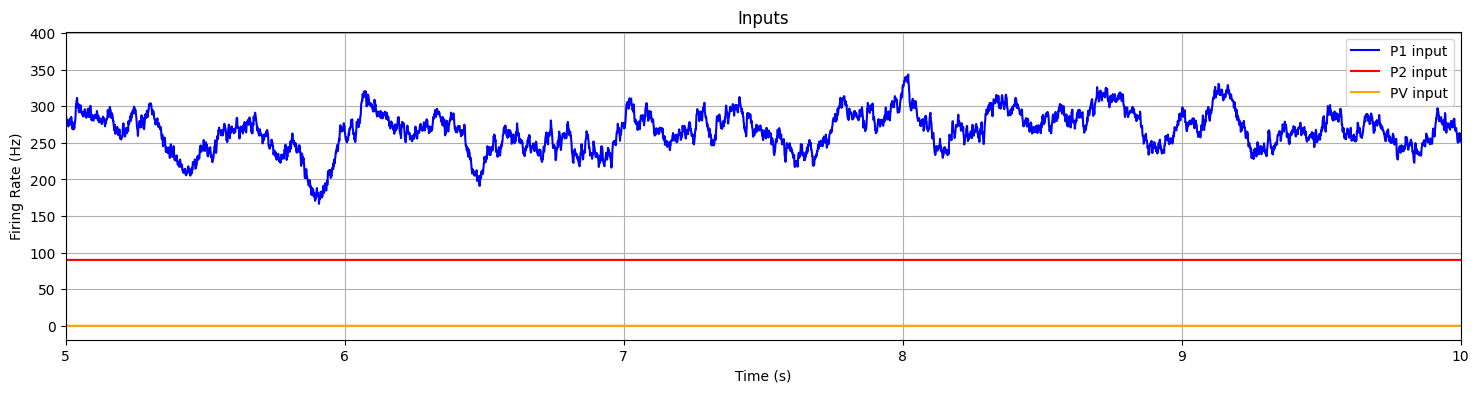

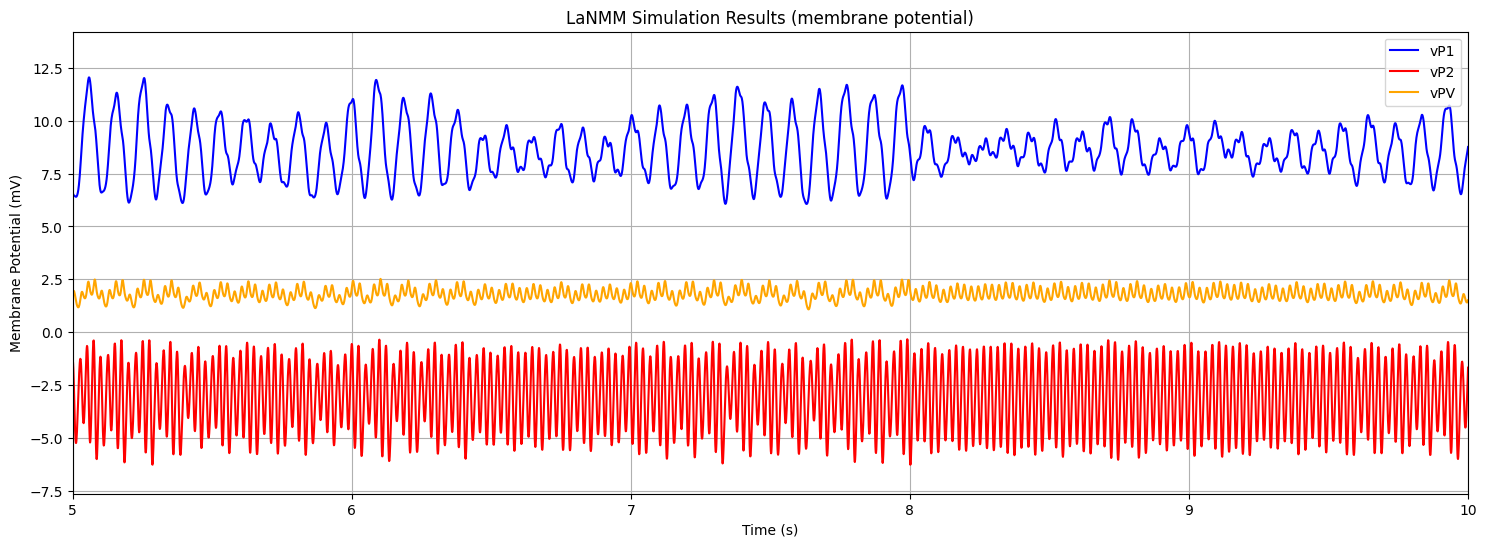

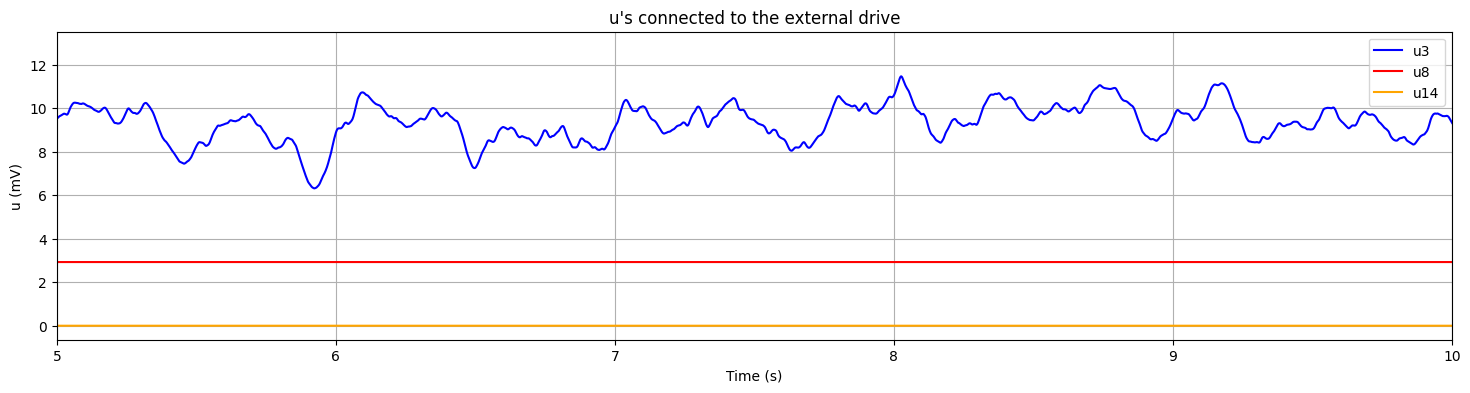

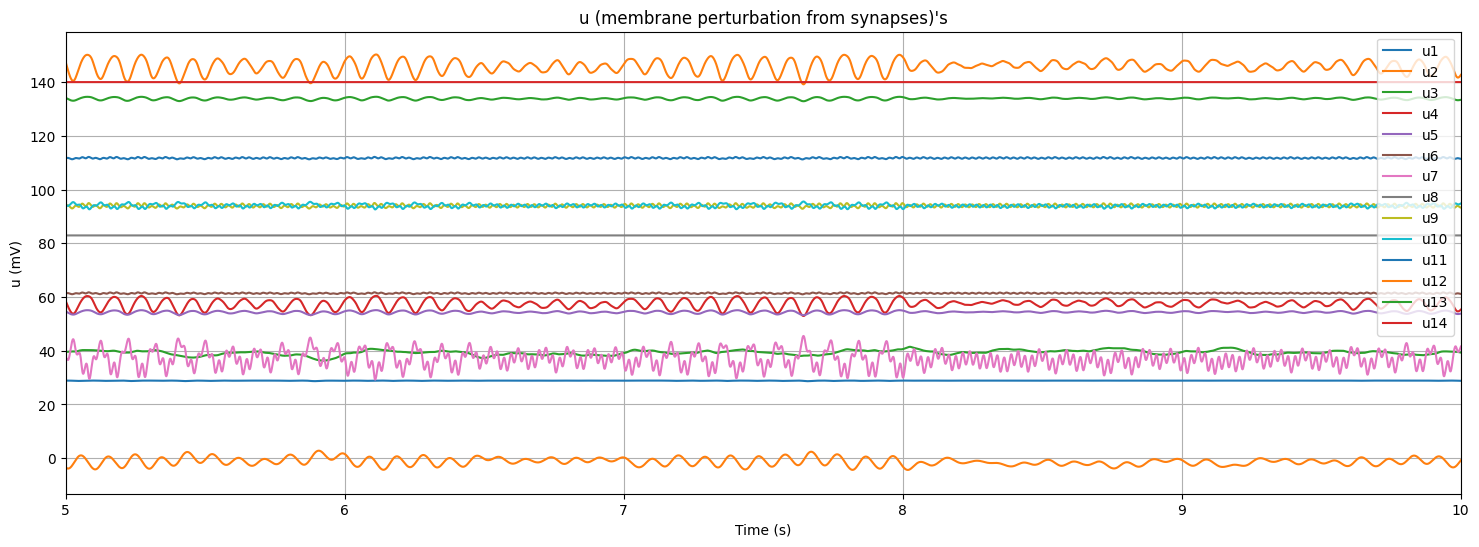

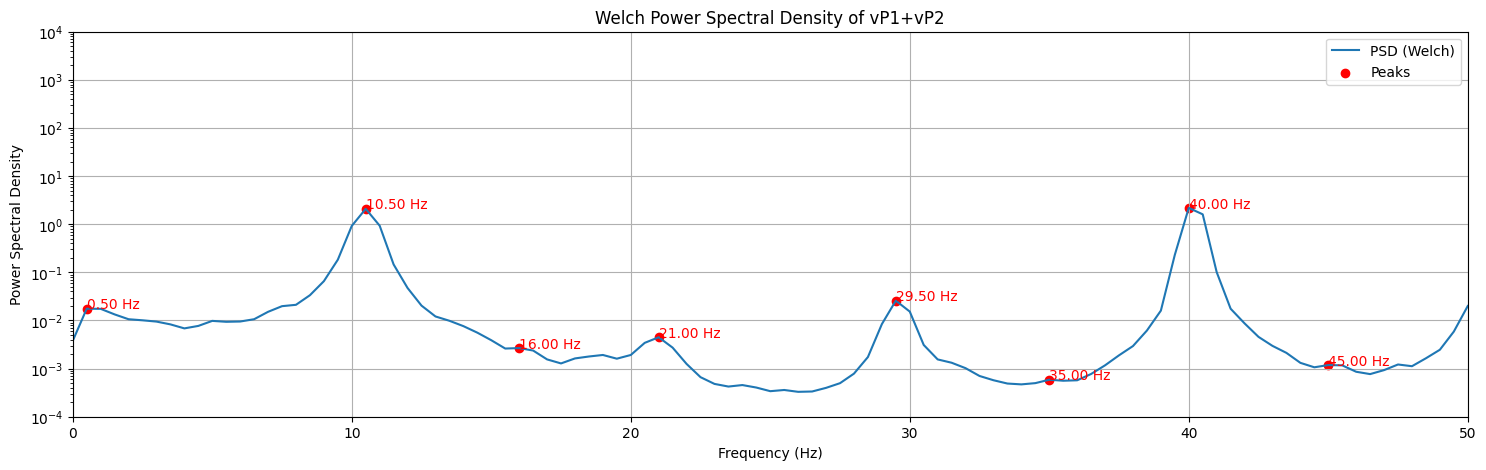

Running parameter sweep for e1_drive_multiscale...


Parameter sweep progress:   0%|          | 0/324 [00:00<?, ?it/s]

Analyzing couplings...
Figure saved as e1_drive_multiscale_20250325_141935/couplings.png


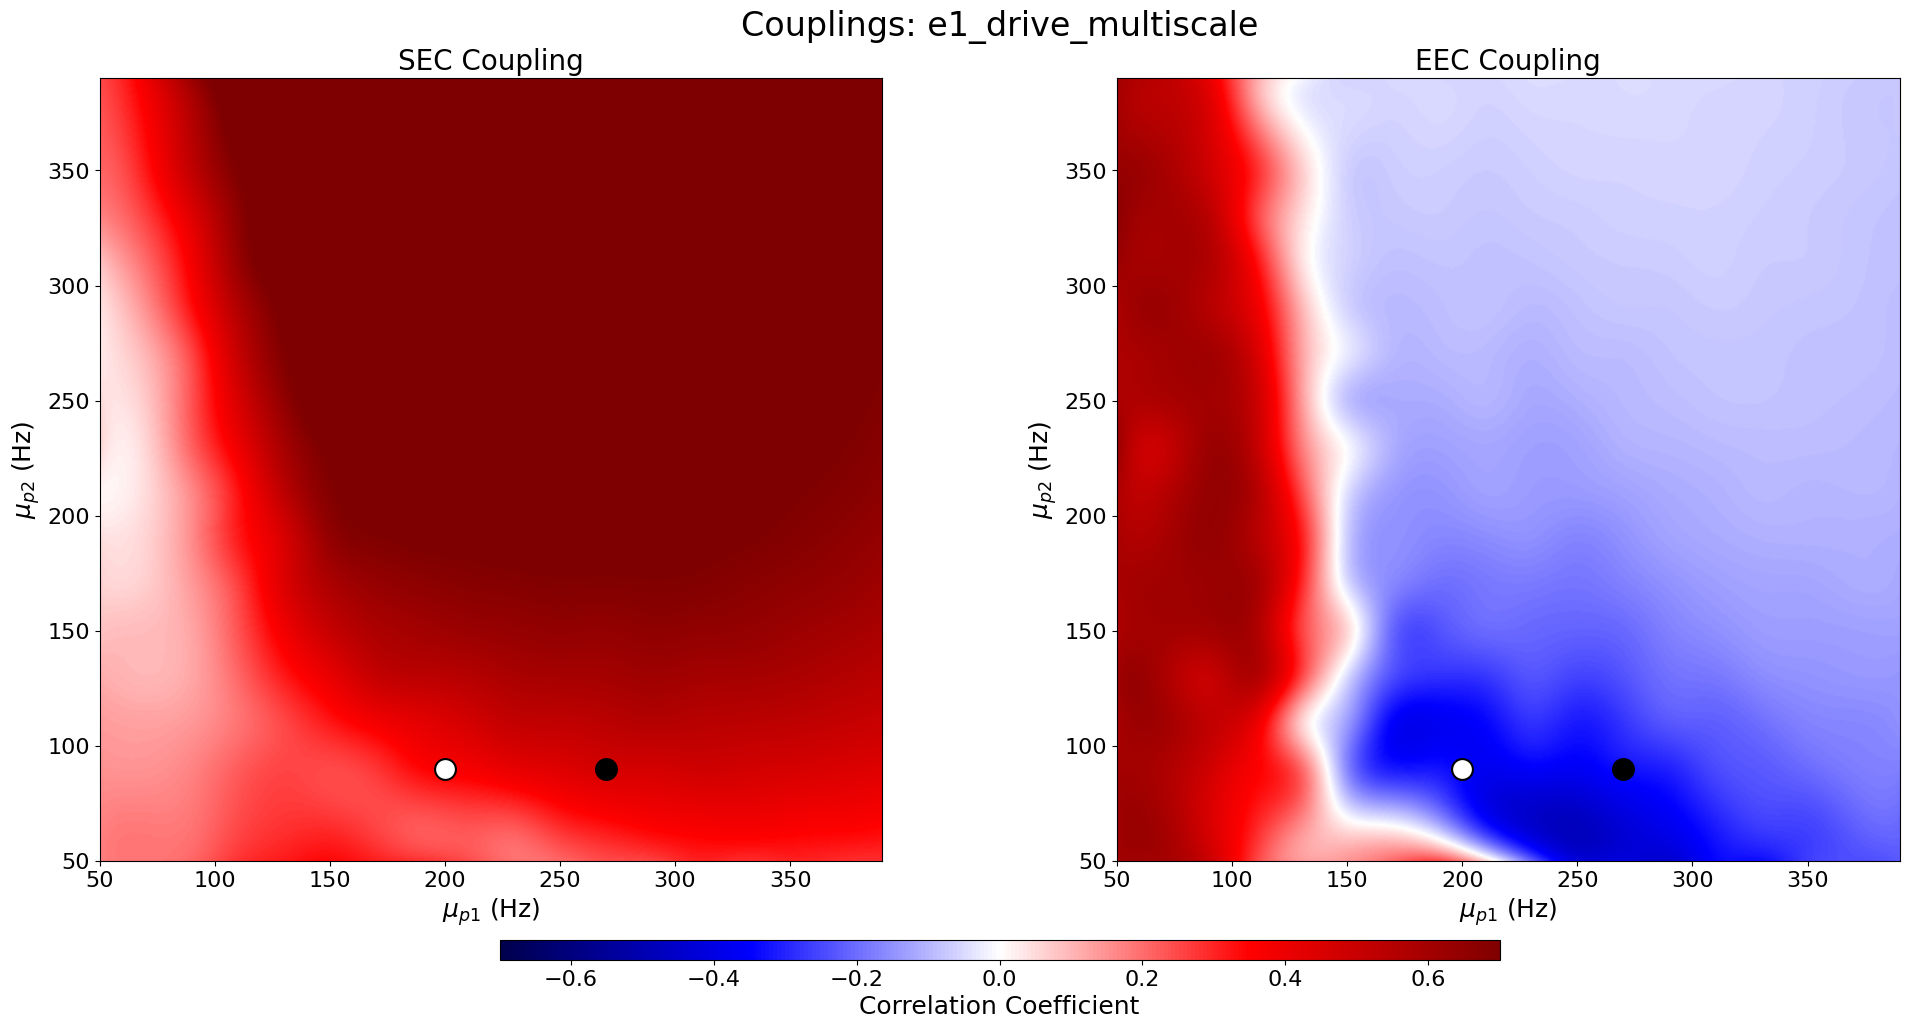

Analyzing power...
Figure saved as e1_drive_multiscale_20250325_141935/power.png


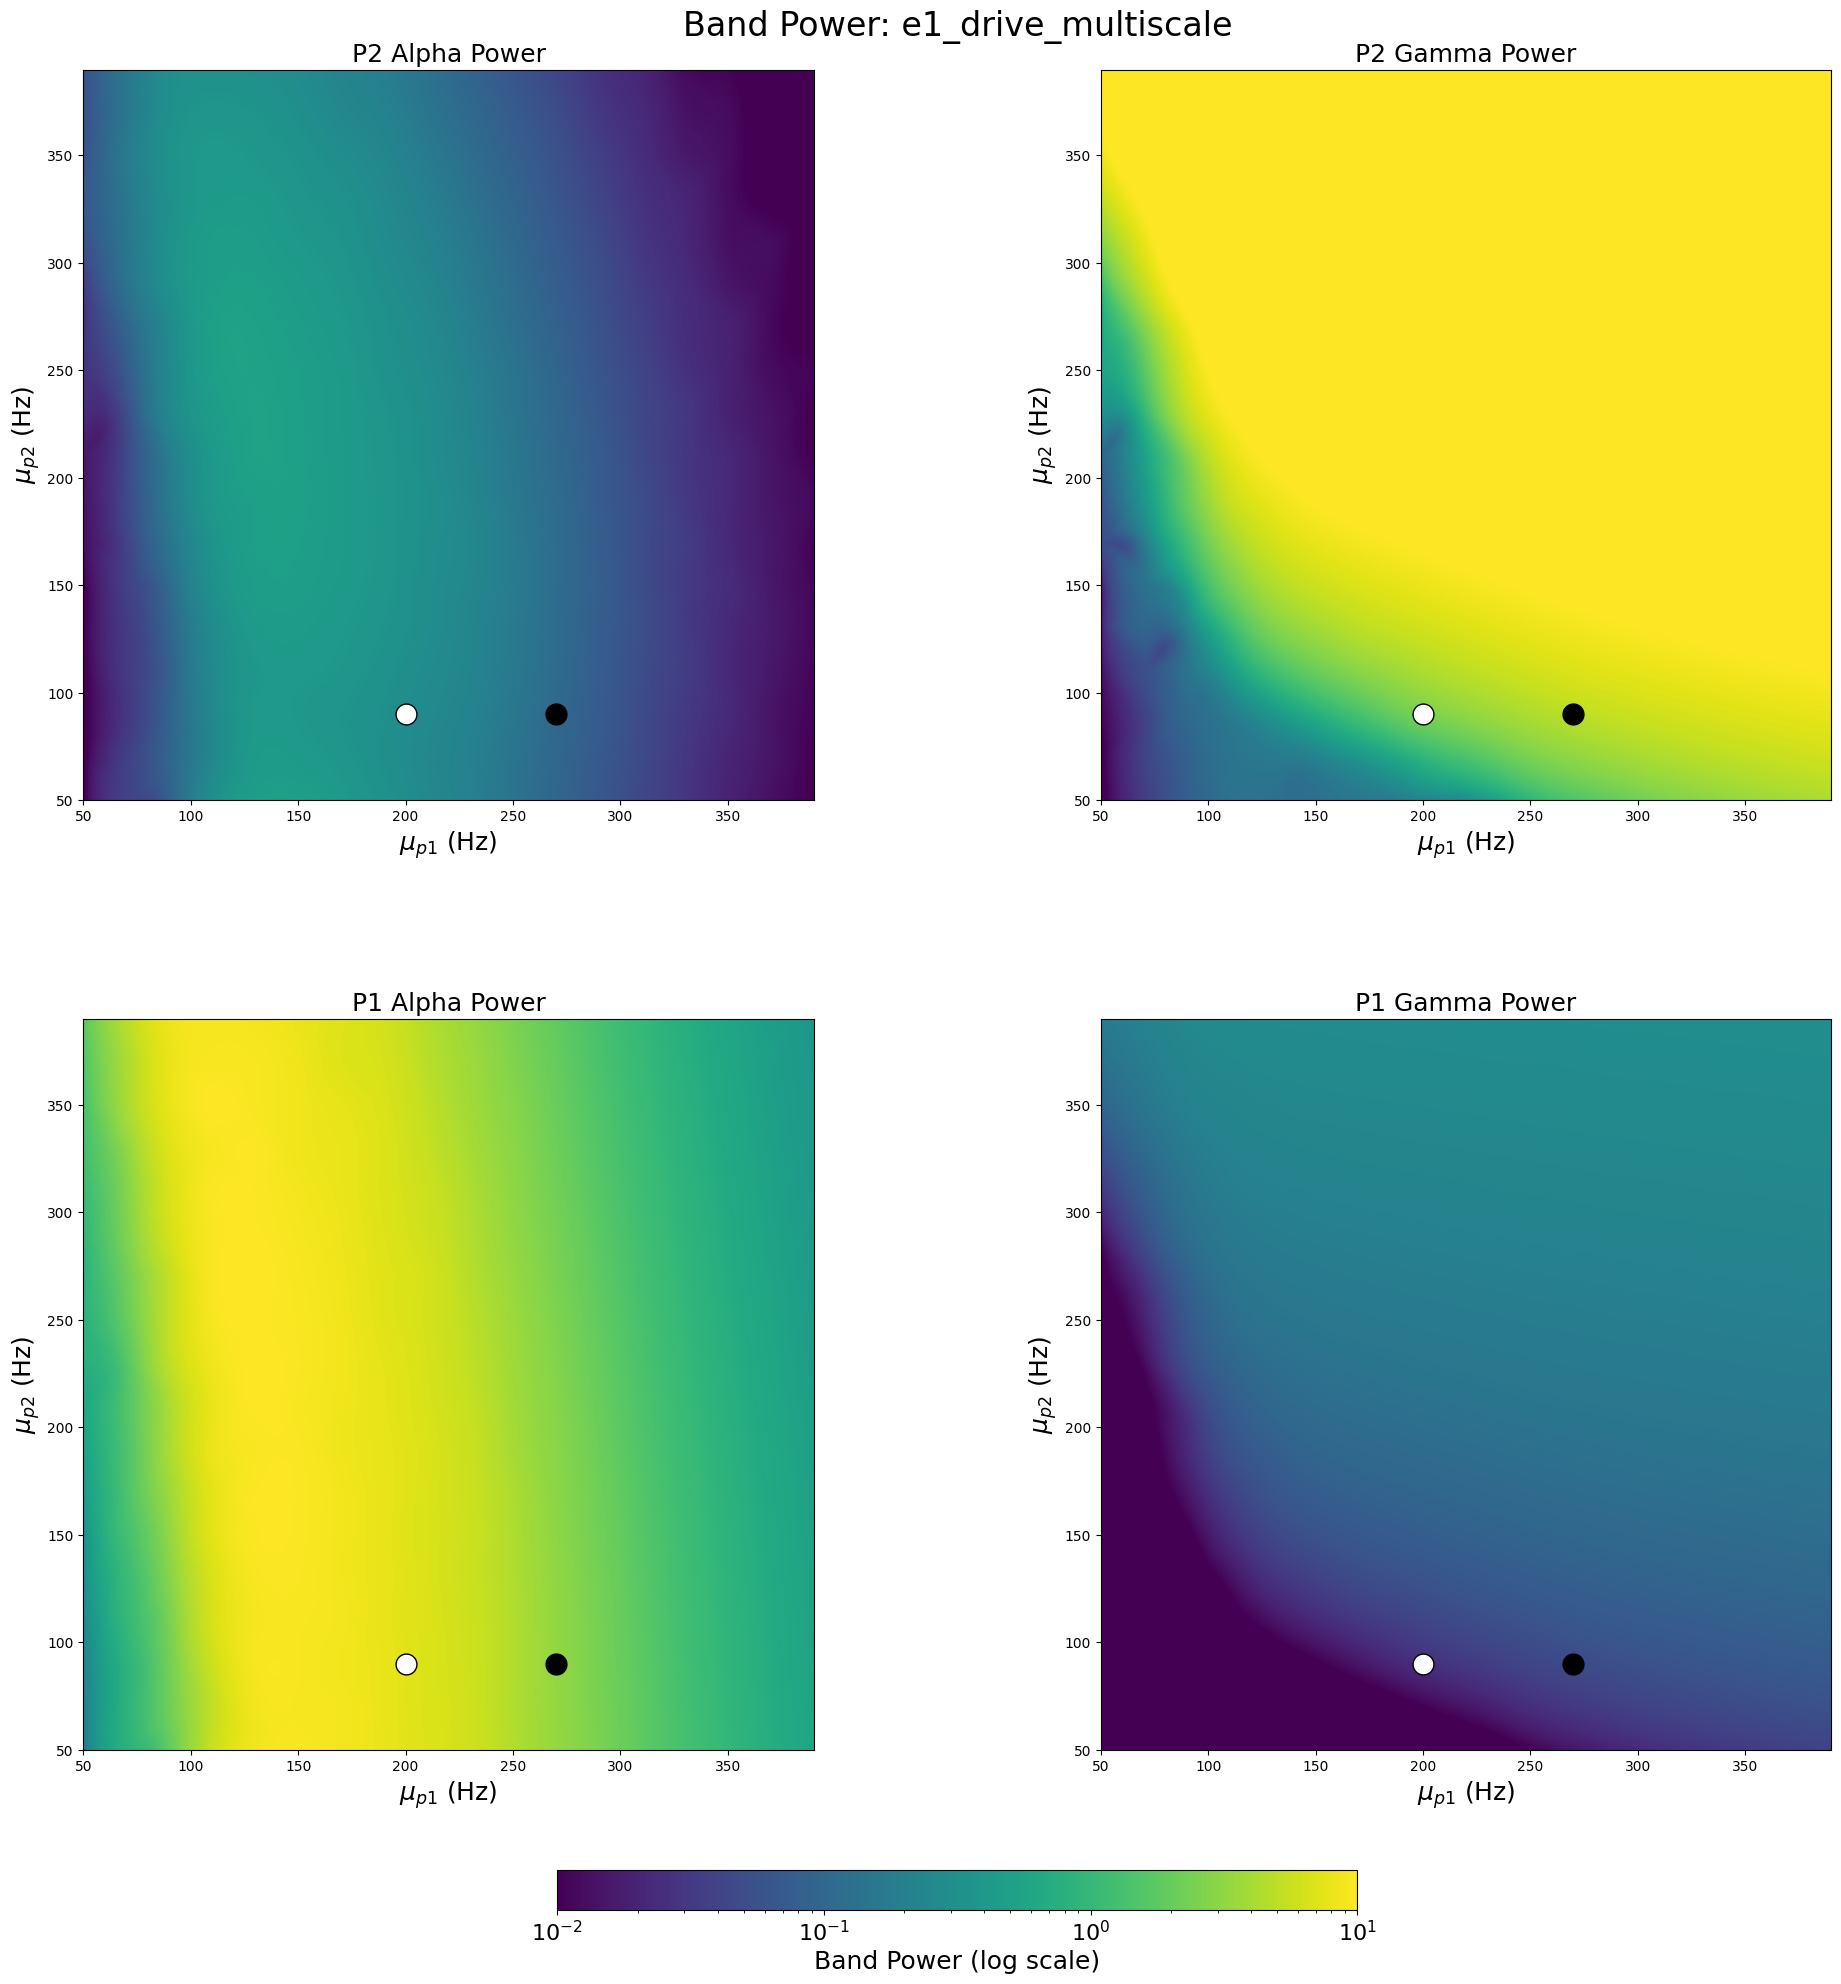

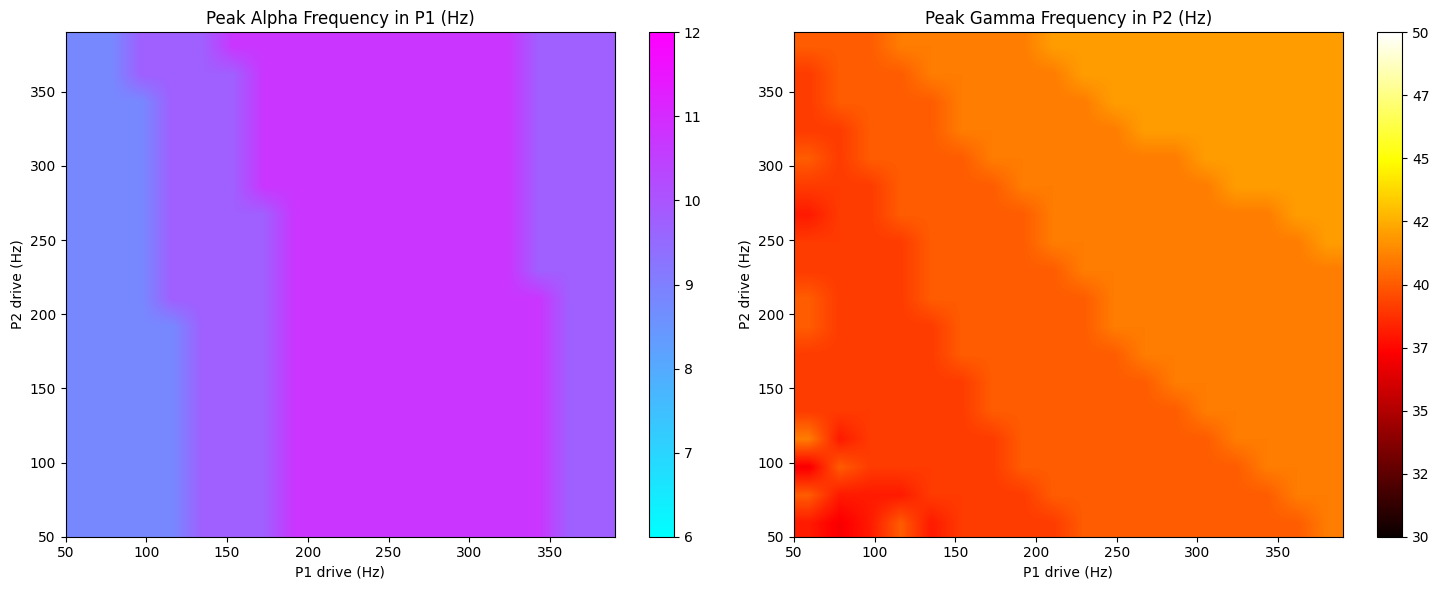

Computing PEIX...
Figure saved as e1_drive_multiscale_20250325_141935/peix.png


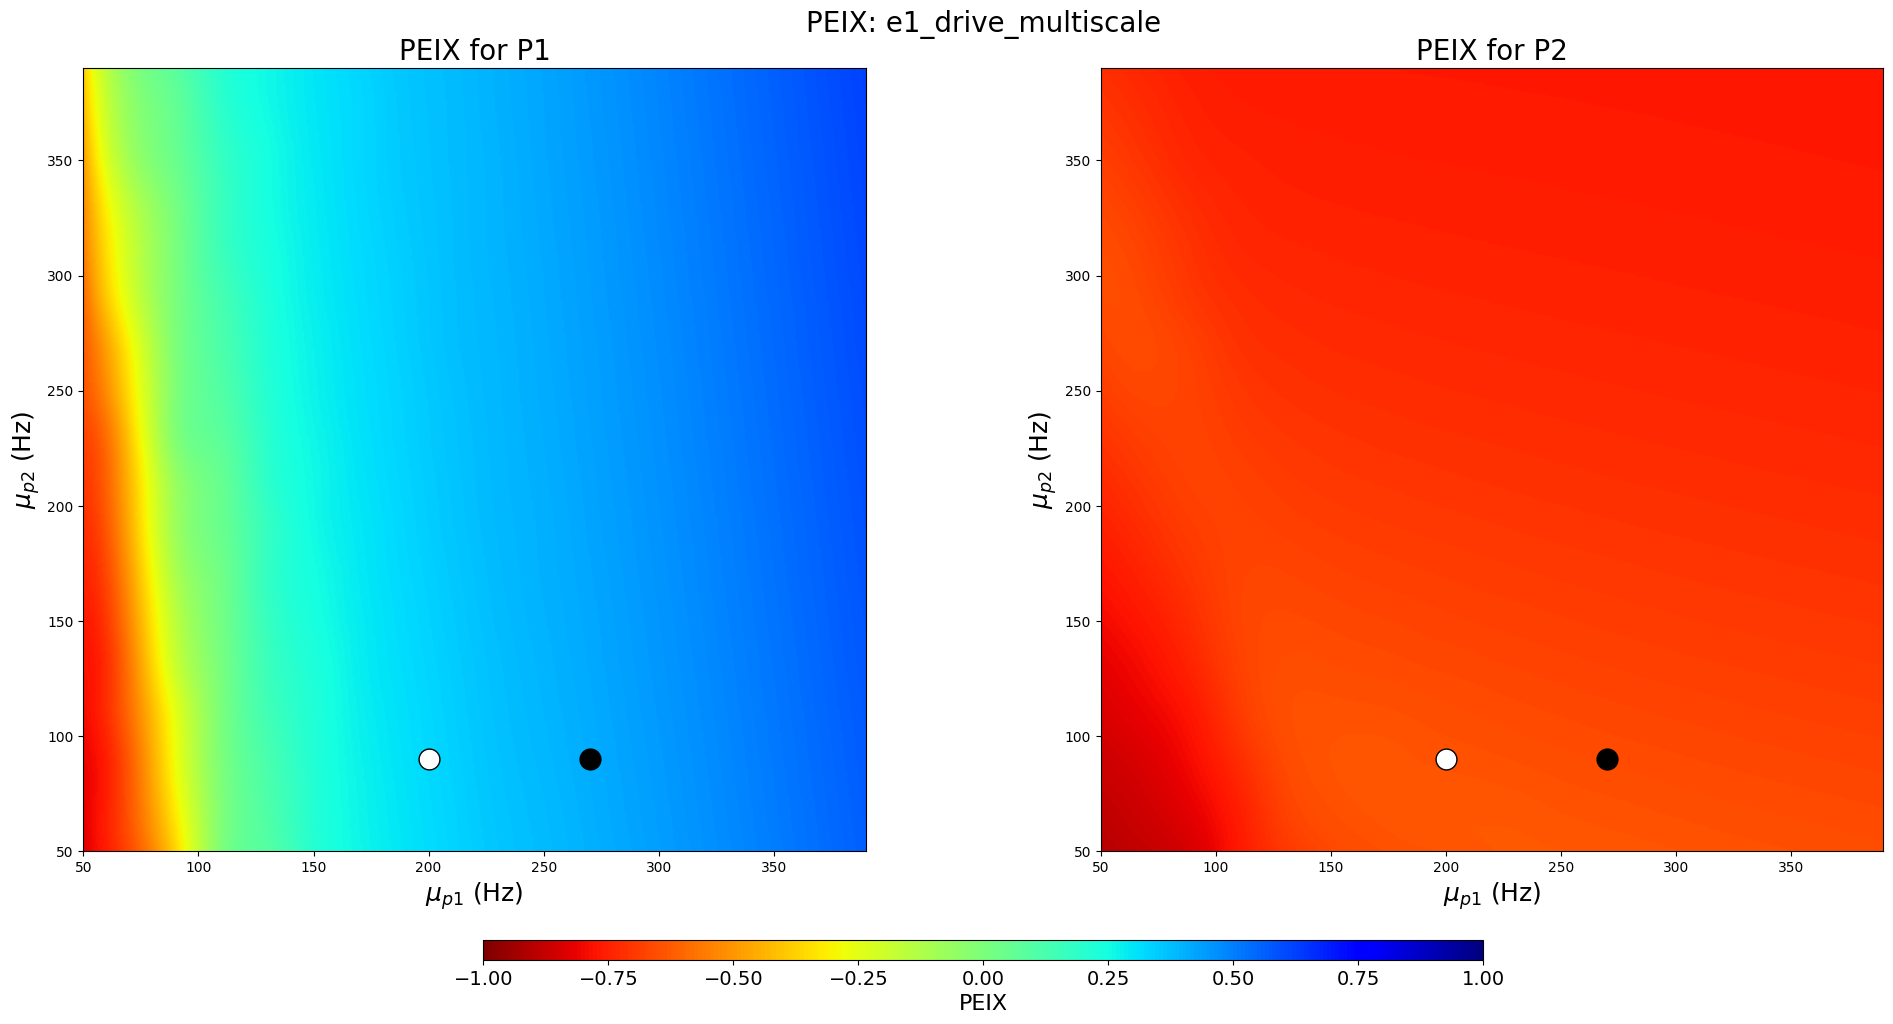

Job completed successfully. Results saved in e1_drive_multiscale_20250325_141935


In [12]:

job_params = {'job_title': 'e1_drive_multiscale',
    'mu_p1_values': mu_p1_values,  # Range of values for P1 drive
    'mu_p2_values': mu_p2_values,  # Range of values for P2 drive
    'tmax': tmax,                        # Simulation duration
    'dt': dt,                         # Time step
    'discard': discard,                      # Transient duration to discard
    'alpha_band': alpha_band,               # Alpha frequency band
    'gamma_band': gamma_band               # Gamma frequency band
}

driving_params = configure_driving_params(e1_config='multiscale')


# Run the job
results = run_sweep_job(
    intrinsic_params=intrinsic_params,
    driving_params=driving_params,
    job_params=job_params
)

In [13]:
intrinsic_params

{'A_AMPA': 3.25,
 'a_AMPA': 100.0,
 'A_GABA_slow': -22.0,
 'a_GABA_slow': 50.0,
 'A_GABA_fast': -30.0,
 'a_GABA_fast': 220.0,
 'C_vals': {1: 116.3076923076923,
  2: 33.7,
  3: 1.0769230769230769,
  4: 135.0,
  5: 33.75,
  6: 70.0,
  7: 550.0,
  8: 1.0,
  9: 200.0,
  10: 100.0,
  11: 86.15384615384615,
  12: 200.0,
  13: 30.0,
  14: 1.0},
 'syn_types': {1: 'AMPA',
  2: 'GABA_slow',
  3: 'AMPA',
  4: 'AMPA',
  5: 'AMPA',
  6: 'AMPA',
  7: 'GABA_fast',
  8: 'AMPA',
  9: 'AMPA',
  10: 'GABA_fast',
  11: 'AMPA',
  12: 'AMPA',
  13: 'AMPA',
  14: 'AMPA'},
 'v0_default': 6.0,
 'v0_p2': 1.0,
 'fmax': 5.0,
 'r_slope': 0.56,
 'include_PV_drive': True}

In [ ]:

job_params = {'job_title': 'e1_drive_am_0Hz',
    'mu_p1_values': mu_p1_values,  # Range of values for P1 drive
    'mu_p2_values': mu_p1_values,  # Range of values for P2 drive
    'tmax': tmax,                        # Simulation duration
    'dt': dt,                         # Time step
    'discard': discard,                      # Transient duration to discard
    'alpha_band': alpha_band,               # Alpha frequency band
    'gamma_band': gamma_band               # Gamma frequency band
}

config= {'mode': 'am',
         'mu': 270.0,
         'carrier_freq': 0.0,  # only for 'am' mode
         'carrier_amplitude': 200.0,  # only for 'am' mode
         'mod_index_slow': 0.9,  # only for 'am' mode
         'mod_index_fast': 0.5}  # only for 'am' mode
driving_params = configure_driving_params(e1_config=config)

# Run the job
results = run_sweep_job(
    intrinsic_params=intrinsic_params,
    driving_params=driving_params,
    job_params=job_params
)

In [ ]:

job_params = {'job_title': 'e2_drive_multiscale',
    'mu_p1_values': mu_p1_values,  # Range of values for P1 drive
    'mu_p2_values': mu_p2_values,  # Range of values for P2 drive
    'tmax': tmax,                        # Simulation duration
    'dt': dt,                         # Time step
    'discard': discard,                      # Transient duration to discard
    'alpha_band': alpha_band,               # Alpha frequency band
    'gamma_band': gamma_band               # Gamma frequency band
}

driving_params = configure_driving_params(e2_config='multiscale')


# Run the job
results = run_sweep_job(
    intrinsic_params=intrinsic_params,
    driving_params=driving_params,
    job_params=job_params
)

In [ ]:

job_params = {'job_title': 'e2_drive_am_0Hz',
    'mu_p1_values': mu_p1_values,  # Range of values for P1 drive
    'mu_p2_values': mu_p1_values,  # Range of values for P2 drive
    'tmax': tmax,                        # Simulation duration
    'dt': dt,                         # Time step
    'discard': discard,                      # Transient duration to discard
    'alpha_band': alpha_band,               # Alpha frequency band
    'gamma_band': gamma_band               # Gamma frequency band
}


config= {'mode': 'am',
         'mu': 270.0,
         'carrier_freq': 0.0,  # only for 'am' mode
         'carrier_amplitude': 200.0,  # only for 'am' mode
         'mod_index_slow': 0.9,  # only for 'am' mode
         'mod_index_fast': 0.}  # only for 'am' mode
driving_params = configure_driving_params(e2_config=config)

# Run the job
results = run_sweep_job(
    intrinsic_params=intrinsic_params,
    driving_params=driving_params,
    job_params=job_params
)

In [ ]:

job_params = {'job_title': 'pv_drive_multiscale',
    'mu_p1_values': mu_p1_values,  # Range of values for P1 drive
    'mu_p2_values': mu_p2_values,  # Range of values for P2 drive
    'tmax': tmax,                        # Simulation duration
    'dt': dt,                         # Time step
    'discard': discard,                      # Transient duration to discard
    'alpha_band': alpha_band,               # Alpha frequency band
    'gamma_band': gamma_band               # Gamma frequency band
}

driving_params = configure_driving_params(pv_config='multiscale')


# Run the job
results = run_sweep_job(
    intrinsic_params=intrinsic_params,
    driving_params=driving_params,
    job_params=job_params
)

In [ ]:

job_params = {'job_title': 'pv_drive_am_0Hz',
    'mu_p1_values': mu_p1_values,  # Range of values for P1 drive
    'mu_p2_values': mu_p1_values,  # Range of values for P2 drive
    'tmax': tmax,                        # Simulation duration
    'dt': dt,                         # Time step
    'discard': discard,                      # Transient duration to discard
    'alpha_band': alpha_band,               # Alpha frequency band
    'gamma_band': gamma_band               # Gamma frequency band
}


config= {'mode': 'am',
         'mu': 0.0,
         'carrier_freq': 0.0,  # only for 'am' mode
         'carrier_amplitude': 200.0,  # only for 'am' mode
         'mod_index_slow': 0.9,  # only for 'am' mode
         'mod_index_fast': 0.5}  # only for 'am' mode
driving_params = configure_driving_params(pv_config=config)

# Run the job
results = run_sweep_job(
    intrinsic_params=intrinsic_params,
    driving_params=driving_params,
    job_params=job_params
)

In [ ]:
driving_params

In [ ]:
intrinsic_params